In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


In [4]:
data_df = pd.DataFrame(data, columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])

data_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
data_df.describe().transform(lambda x: round(x, 2))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
data_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [8]:
data_df['Price'] = target

In [9]:
data_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
# Correlation

data_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

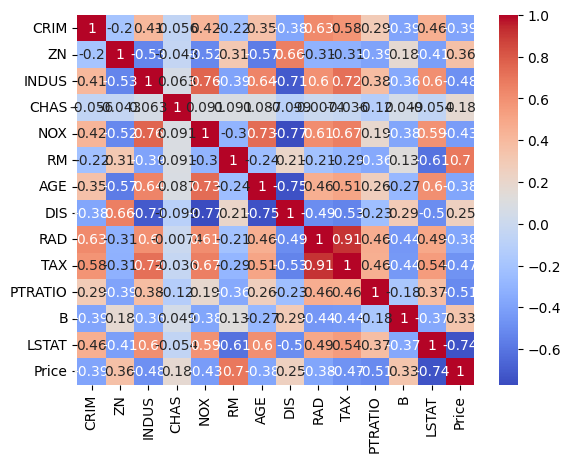

In [11]:
sns.heatmap(data_df.corr(), annot=True, cmap='coolwarm')

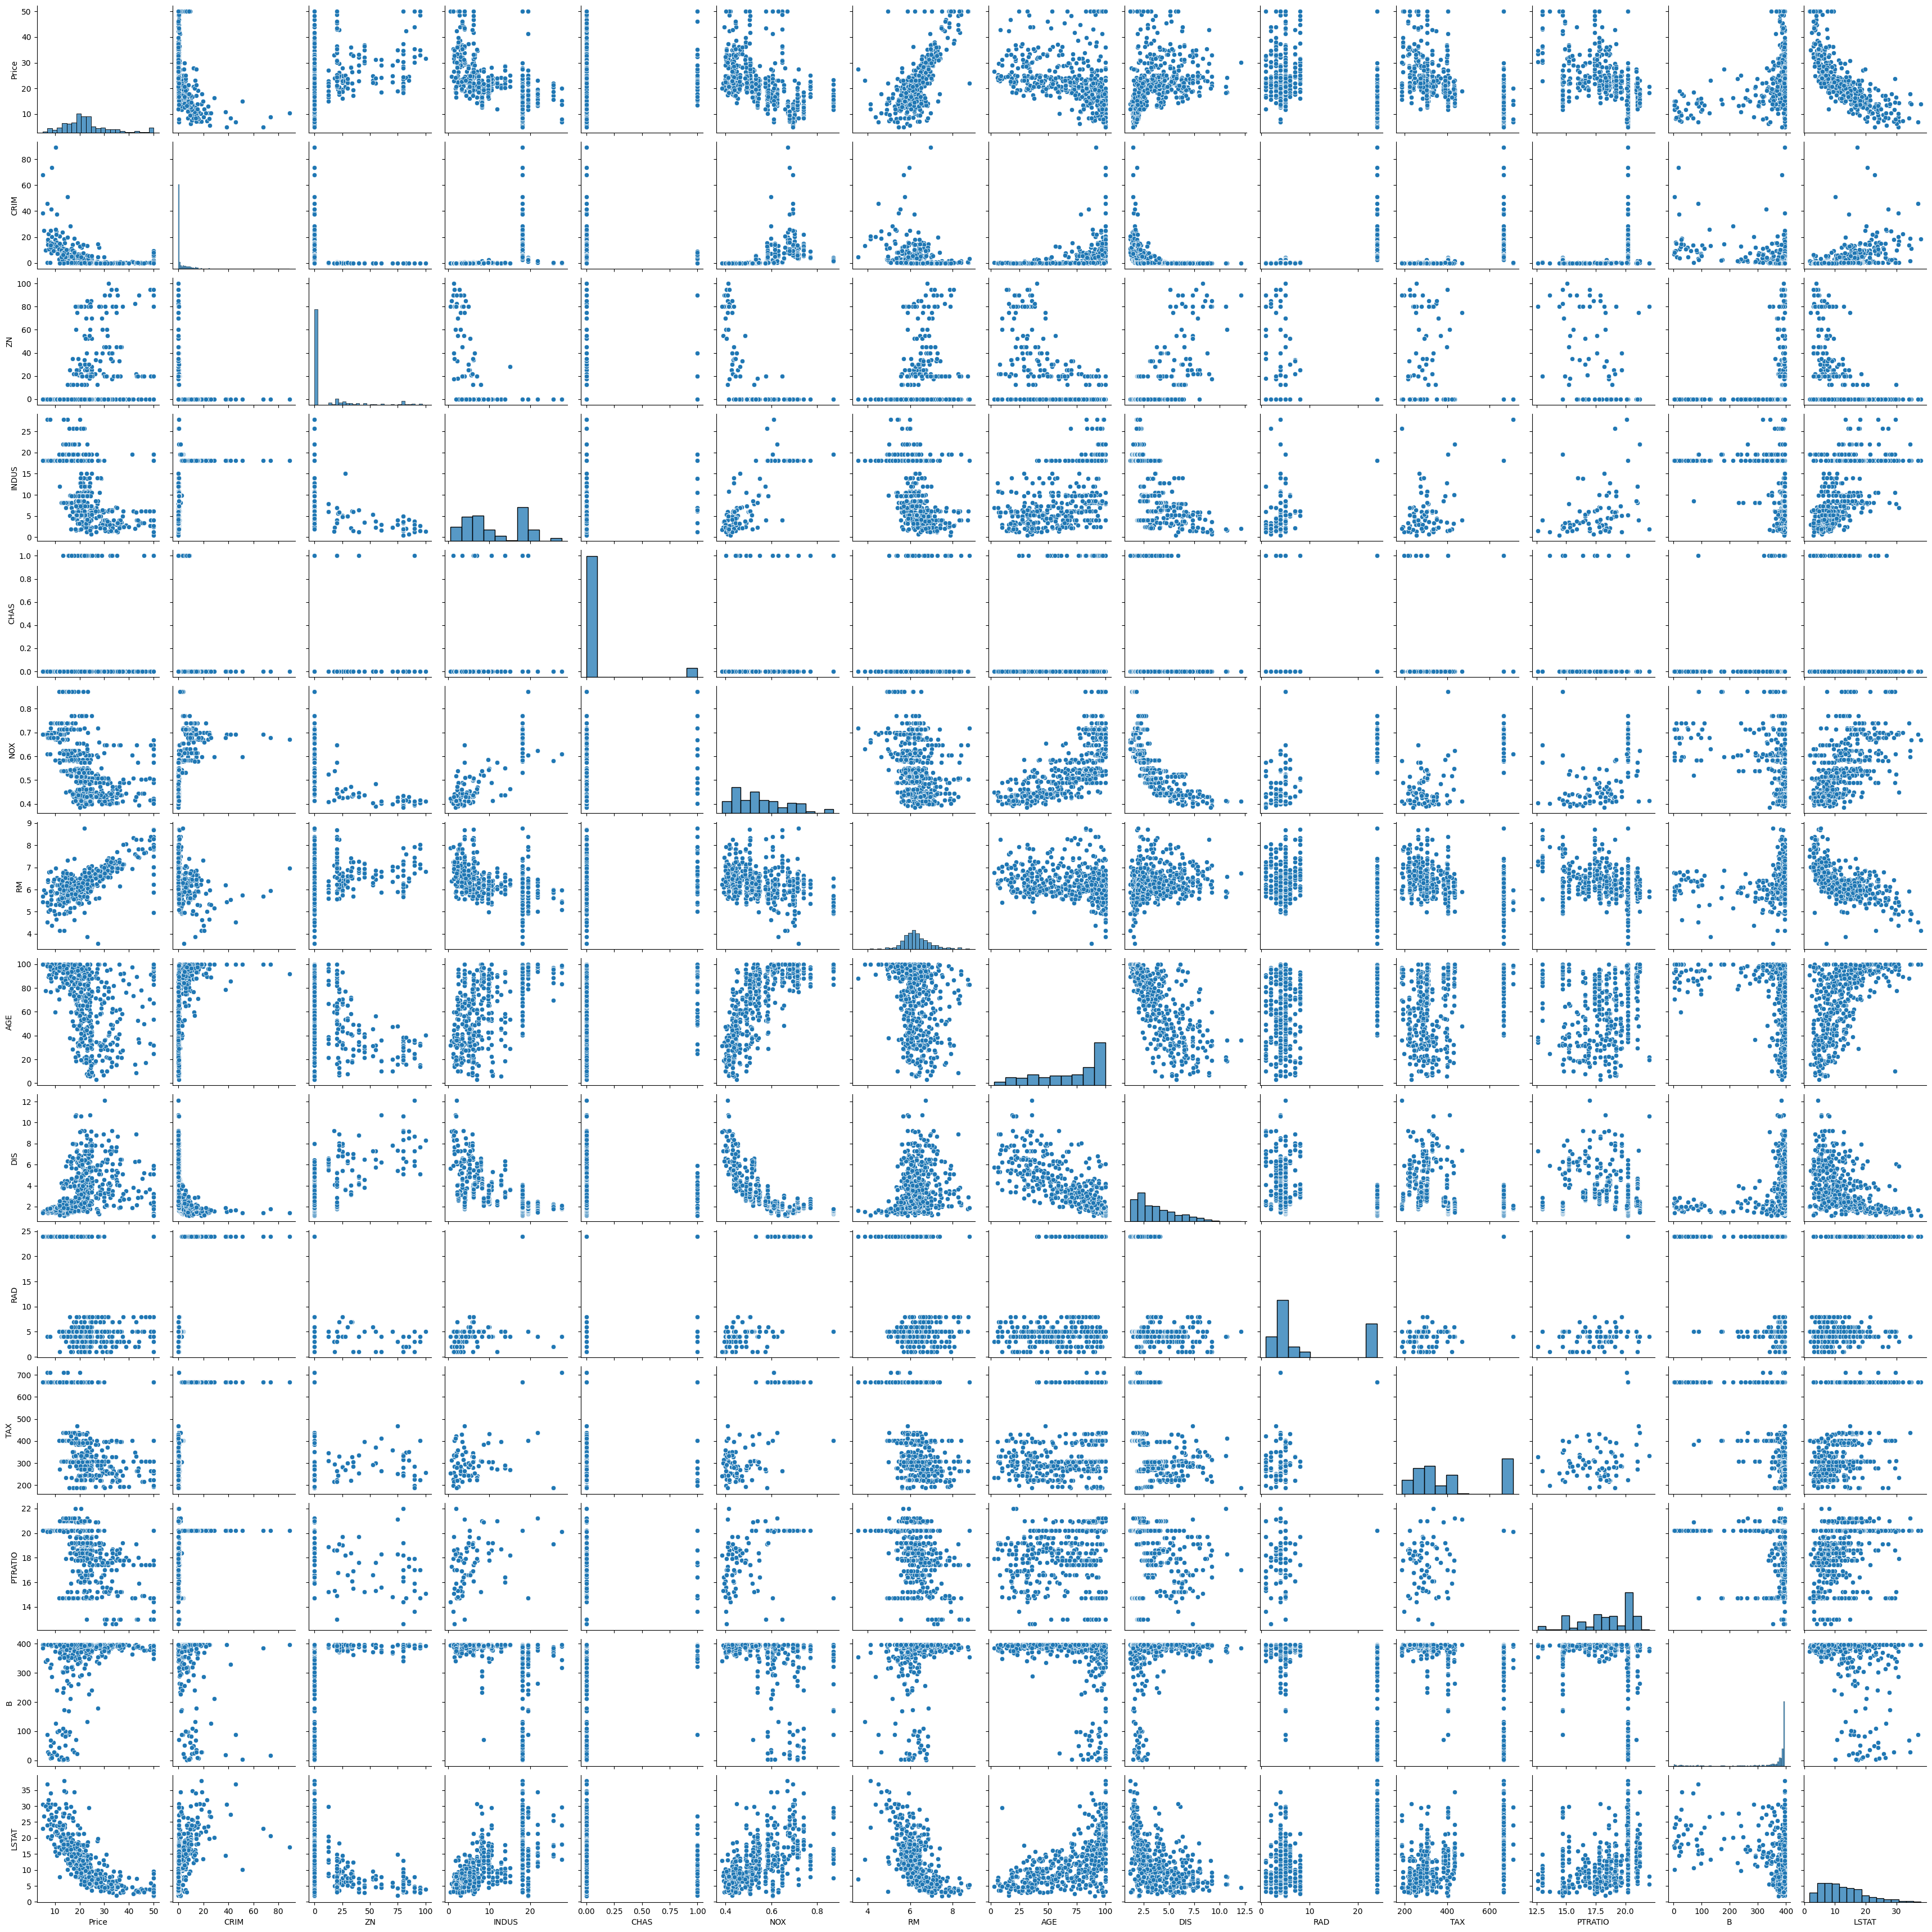

In [12]:
sns.pairplot(data_df[['Price', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']])

Text(0, 0.5, 'Price')

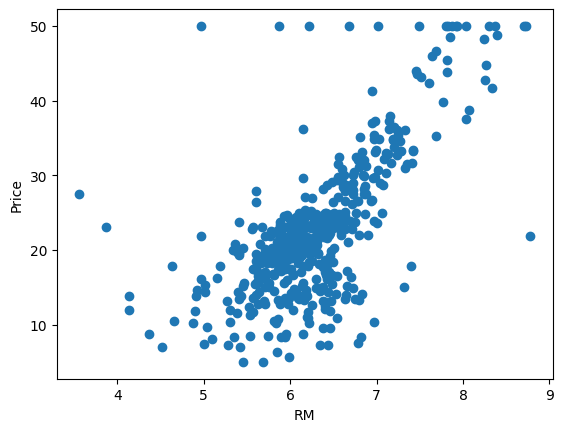

In [13]:
plt.scatter(data_df['RM'], data_df['Price'])
plt.xlabel('RM')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

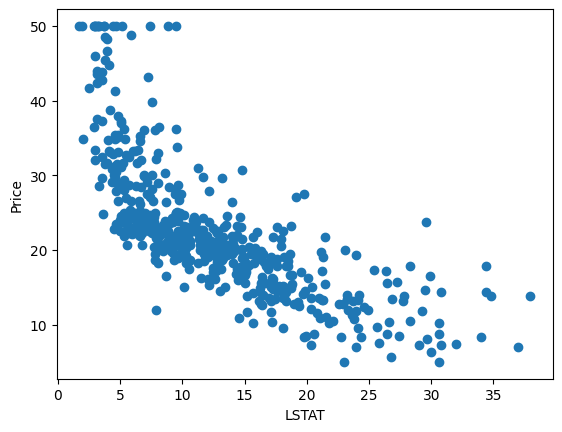

In [14]:
plt.scatter(data_df['LSTAT'], data_df['Price'])
plt.xlabel('LSTAT')
plt.ylabel('Price')

<Axes: xlabel='RM', ylabel='Price'>

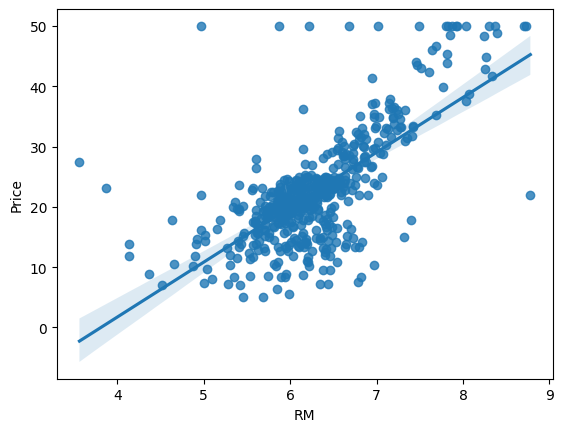

In [15]:
sns.regplot(x='RM', y='Price', data=data_df)

<Axes: xlabel='LSTAT', ylabel='Price'>

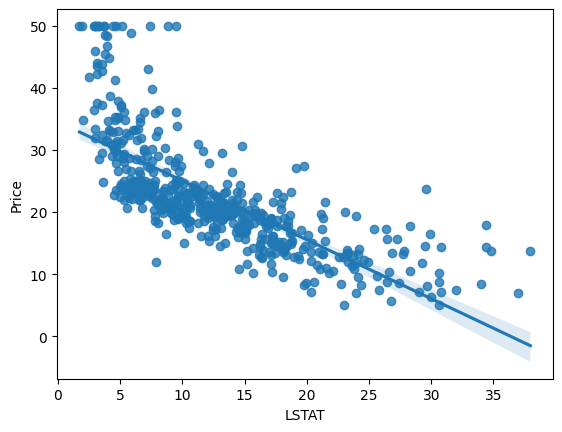

In [16]:
sns.regplot(x='LSTAT', y='Price', data=data_df)

<Axes: xlabel='CHAS', ylabel='Price'>

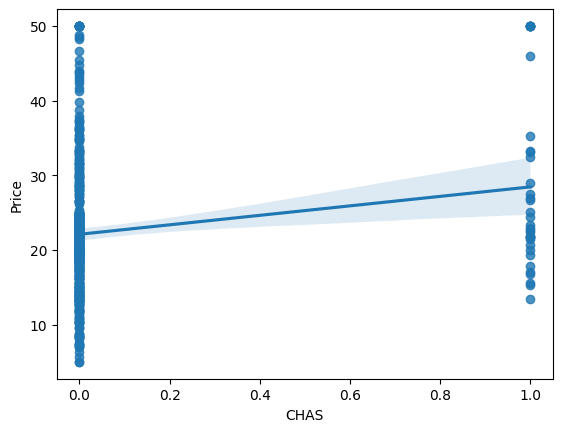

In [17]:
sns.regplot(x='CHAS', y='Price', data=data_df)

<Axes: xlabel='PTRATIO', ylabel='Price'>

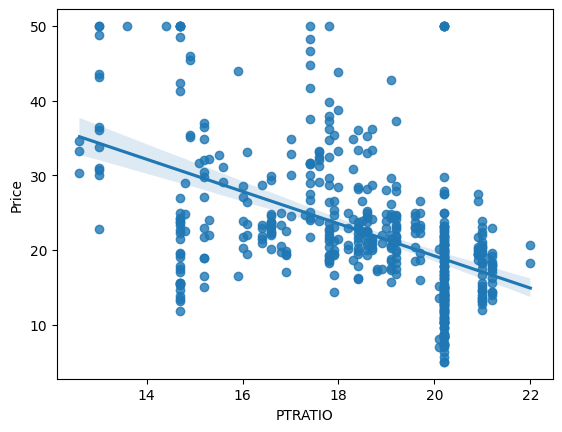

In [18]:
sns.regplot(x='PTRATIO', y='Price', data=data_df)

In [19]:
# Train Test Split

from sklearn.model_selection import train_test_split

X = data_df.drop('Price', axis=1)
y = data_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
# Model Training

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [22]:
print('Coefficients: ', lr.coef_)

Coefficients:  [-1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194   3.14523956
 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151  1.12956831
 -3.61165842]


In [23]:
print('Intercept: ', lr.intercept_)

Intercept:  22.796534653465343


In [24]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [25]:
y_pred = lr.predict(X_test_scaled)

In [26]:
y_pred

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

Text(0, 0.5, 'Predicted Price')

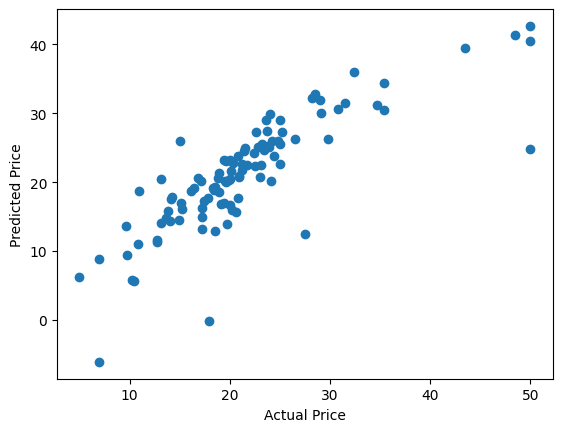

In [27]:
# Scatter plot of actual vs predicted values

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

<Axes: xlabel='Price', ylabel='Density'>

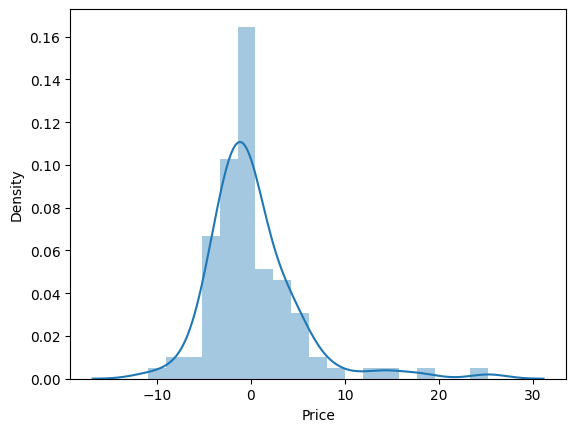

In [28]:
# Residuals

residuals = y_test - y_pred
sns.distplot(residuals)

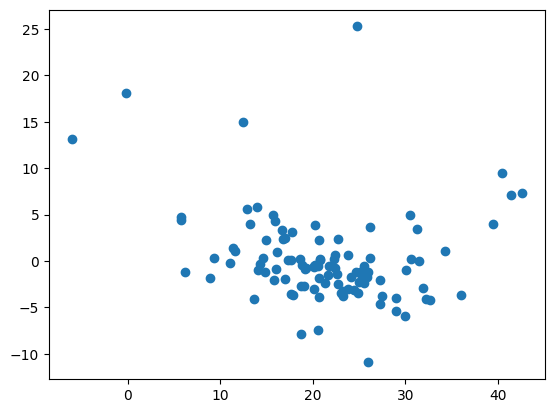

In [29]:
# Scatter plot of residuals

plt.scatter(y_pred, residuals)

In [30]:
# Evaluation Metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [31]:
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Root Mean Square Error: ',np.sqrt(mean_squared_error(y_test, y_pred))) # Root Mean Squared Error

Mean Absolute Error:  3.1890919658878465
Mean Squared Error:  24.291119474973513
Root Mean Square Error:  4.928602182665336


In [32]:
print('R2 Score: ', r2_score(y_test, y_pred))

R2 Score:  0.668759493535632


In [33]:
# Cross Validation

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='r2')
print(cv_scores)

[0.77501982 0.62424945 0.7594282  0.78766681 0.67581438]


In [34]:
print('Mean CV R2 Score: ', np.mean(cv_scores))

Mean CV R2 Score:  0.7244357342240262


In [35]:
# Feature Importance

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': lr.coef_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance

,Feature,Importance
5,RM,3.145240
8,RAD,2.251407
11,B,1.129568
3,CHAS,0.718738
1,ZN,0.696269
2,INDUS,0.278065
6,AGE,-0.176048
0,CRIM,-1.002135
9,TAX,-1.767014
4,NOX,-2.022319


<Axes: xlabel='Importance', ylabel='Feature'>

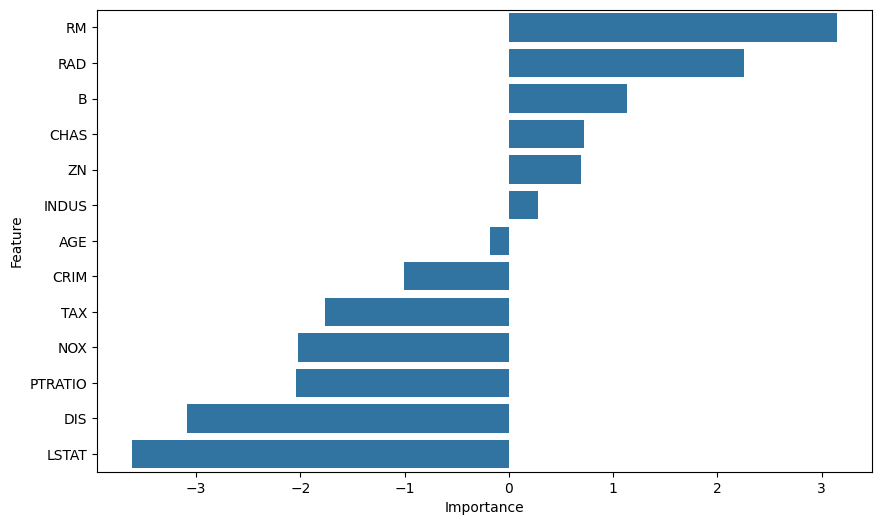

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)

In [37]:
# Regularization

from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

print('Lasso Coefficients: ', lasso.coef_)
print('Lasso Intercept: ', lasso.intercept_)

Lasso Coefficients:  [-0.71836455  0.25962714 -0.          0.69822096 -1.56814243  3.27150693
 -0.         -2.28444944  0.67193802 -0.3566537  -1.89333519  1.03136581
 -3.60941047]
Lasso Intercept:  22.796534653465343


In [38]:
y_pred_lasso = lasso.predict(X_test_scaled)

print('Lasso R2 Score: ', r2_score(y_test, y_pred_lasso))

Lasso R2 Score:  0.6501375183238985


In [39]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train)

print('Ridge Coefficients: ', ridge.coef_)
print('Ridge Intercept: ', ridge.intercept_)
y_pred_ridge = ridge.predict(X_test_scaled)

print('Ridge R2 Score: ', r2_score(y_test, y_pred_ridge))

Ridge Coefficients:  [-1.00111591  0.69436316  0.27539404  0.71912548 -2.01912122  3.14590087
 -0.17617627 -3.07816919  2.24333232 -1.75959591 -2.03674427  1.12933027
 -3.61037565]
Ridge Intercept:  22.796534653465343
Ridge R2 Score:  0.6687298368808312


In [40]:
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='r2')

In [41]:
print('Best Parameters: ', grid_search.best_params_)
print('Best R2 Score: ', grid_search.best_score_)
print('Best Estimator: ', grid_search.best_estimator_)

Best Parameters:  {'alpha': 0.001}
Best R2 Score:  0.7244147529976714
Best Estimator:  Lasso(alpha=0.001)


In [42]:
# Prediction using best estimator

best_lasso = grid_search.best_estimator_
y_pred_best = best_lasso.predict(X_test_scaled)

print('Best Lasso R2 Score: ', r2_score(y_test, y_pred_best))


Best Lasso R2 Score:  0.6687128230636585


In [45]:
# Prediction of data

print('Predicted Price: ', best_lasso.predict(scaler.transform([[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.0900, 1.0, 296.0, 15.3, 396.90, 4.98]])))

Predicted Price:  [29.96479584]


In [46]:
# Saving the model

import pickle

filename = 'boston_house_price_prediction_model.pkl'
pickle.dump(best_lasso, open(filename, 'wb'))

In [48]:
pickle_model = pickle.load(open(filename, 'rb'))
print('Predicted Price: ', pickle_model.predict(scaler.transform([[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.0900, 1.0, 296.0, 15.3, 396.90, 4.98]])))

Predicted Price:  [29.96479584]


In [49]:
# Saving the scaler

scaler_filename = 'boston_house_price_prediction_scaler.pkl'
pickle.dump(scaler, open(scaler_filename, 'wb'))

pickle_scaler = pickle.load(open(scaler_filename, 'rb'))

In [51]:
print('Predicted Price: ', pickle_model.predict(pickle_scaler.transform([[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.0900, 1.0, 296.0, 15.3, 396.90, 4.98]])))

Predicted Price:  [29.96479584]
